
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 3 <br>
</div>


---



### Full Name : Mohamad Hosein Mehdikhani
### Student Number : 400102039
___

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

First, read the image:

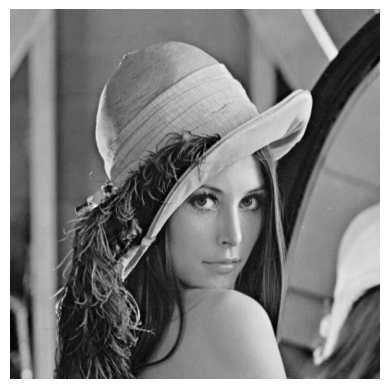

In [3]:
gray = cv2.imread("lena.png", 0)
plt.axis('off')
plt.imshow(gray, cmap="gray")

*Complete* the sp function below to add random salt and pepper noise to the image with rate n. generate noisy images with rates 0.1, 0.2, 0.3, ... ,1.

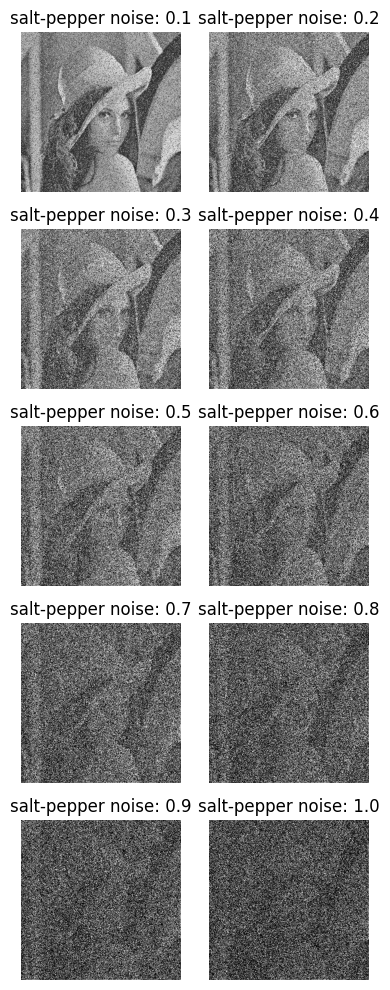

In [4]:

def sp(pic, n):
    ######################## YOUR CODE GOES HERE ########################
    noise_img = pic.copy()
    height, width = noise_img.shape

    num_pixels = int(n * height * width)

    salt_coords = [np.random.randint(0, i-1, num_pixels) for i in noise_img.shape]
    noise_img[salt_coords[0], salt_coords[1]] = 255

    pepper_coords = [np.random.randint(0, i-1, num_pixels) for i in noise_img.shape]
    noise_img[pepper_coords[0], pepper_coords[1]] = 0

    ######################### END OF YOUR CODE ##########################
    return noise_img

a = []
for i in range(1, 11):
    a.append(sp(gray, 0.1 * i))

fig, axes = plt.subplots(5, 2, figsize=(4, 10))
axes = axes.flatten()

for idx, (ax, img) in enumerate(zip(axes, a)):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"salt-pepper noise: {np.round((idx + 1) * 0.1, 2)}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Implement a function that takes a noisy image as input and applies a mean filter of size kernel_size * kernel_size on it. Use numpy only.



In [5]:

def apply_mean_filter(image, kernel_size):
    """
    Apply an n x n mean filter to the input image using zero padding.

    Parameters:
        image (np.ndarray): Grayscale image
        kernel_size (int): Size of the mean filter (must be odd)

    Returns:
        np.ndarray: Filtered image of same shape
    """
    ######################## YOUR CODE GOES HERE ########################
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd")


    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    filtered_image = np.zeros_like(image)


    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)


    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.sum(neighborhood * kernel)

    ######################### END OF YOUR CODE ##########################
    return filtered_image

In [6]:
def display_results(noisy_image, method_function, filter_name):
    pics = [noisy_image]
    titles = ["Original noisy image"]
    kernel_sizes = [3, 5, 7]
    for i, k in enumerate(kernel_sizes):
        filtered_image = method_function(a[0], k)
        pics.append(filtered_image)
        titles.append(f"{filter_name} filter with kernel size {k}")

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()

    for idx, (ax, img) in enumerate(zip(axes, pics)):
        ax.imshow(img, cmap='gray')
        ax.set_title(titles[idx])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


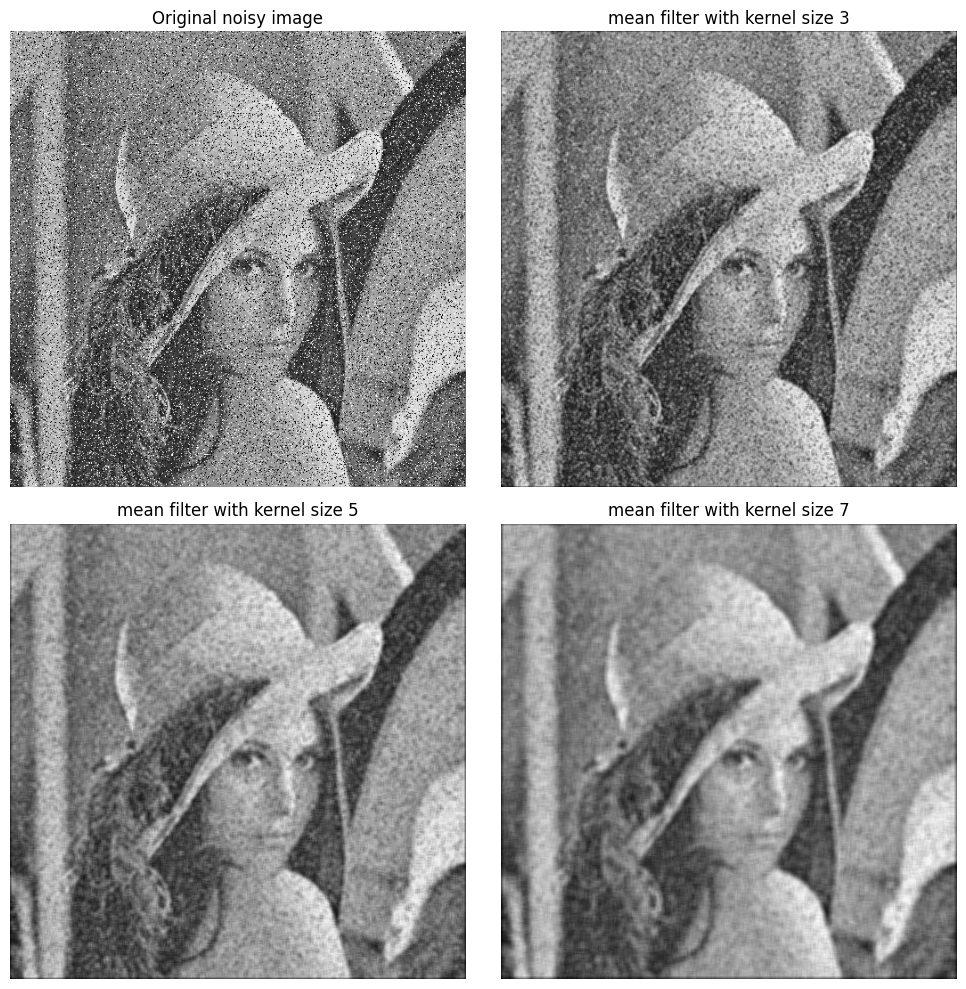

In [7]:
display_results(a[0], apply_mean_filter, filter_name="mean")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 mean filter.

###Your Answer:


Use cv2's built-in function(s) to do the same as the mean filter you implemented above.



In [8]:
import cv2

def builtin_mean_filter(image, kernel_size):
    ######################## YOUR CODE GOES HERE ########################
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    ######################### END OF YOUR CODE ##########################
    return filtered_image

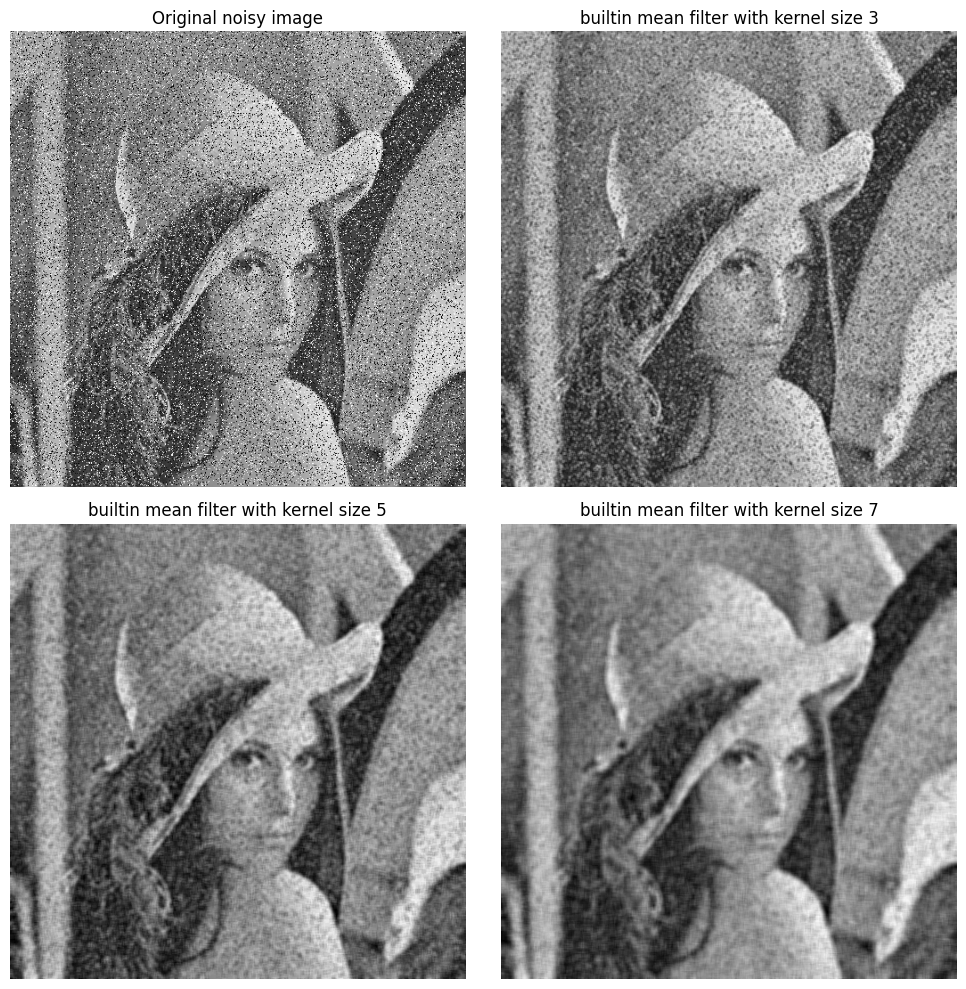

In [9]:
display_results(a[0], builtin_mean_filter, filter_name="builtin mean")

Implement a function that takes a noisy image as input and applies a median filter of size kernel_size * kernel_size on it. Use numpy only.

In [10]:
import numpy as np

def apply_median_filter(image, kernel_size):
    """
    Apply an n x n median filter to a grayscale image using zero padding.

    Parameters:
        image (np.ndarray): 2D grayscale image
        kernel_size (int): Size of the filter kernel (must be odd)

    Returns:
        np.ndarray: Filtered image
    """
    ######################## YOUR CODE GOES HERE ########################
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")

    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)

    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]

            filtered_image[i, j] = np.median(neighborhood)

    ######################### END OF YOUR CODE ##########################
    return filtered_image

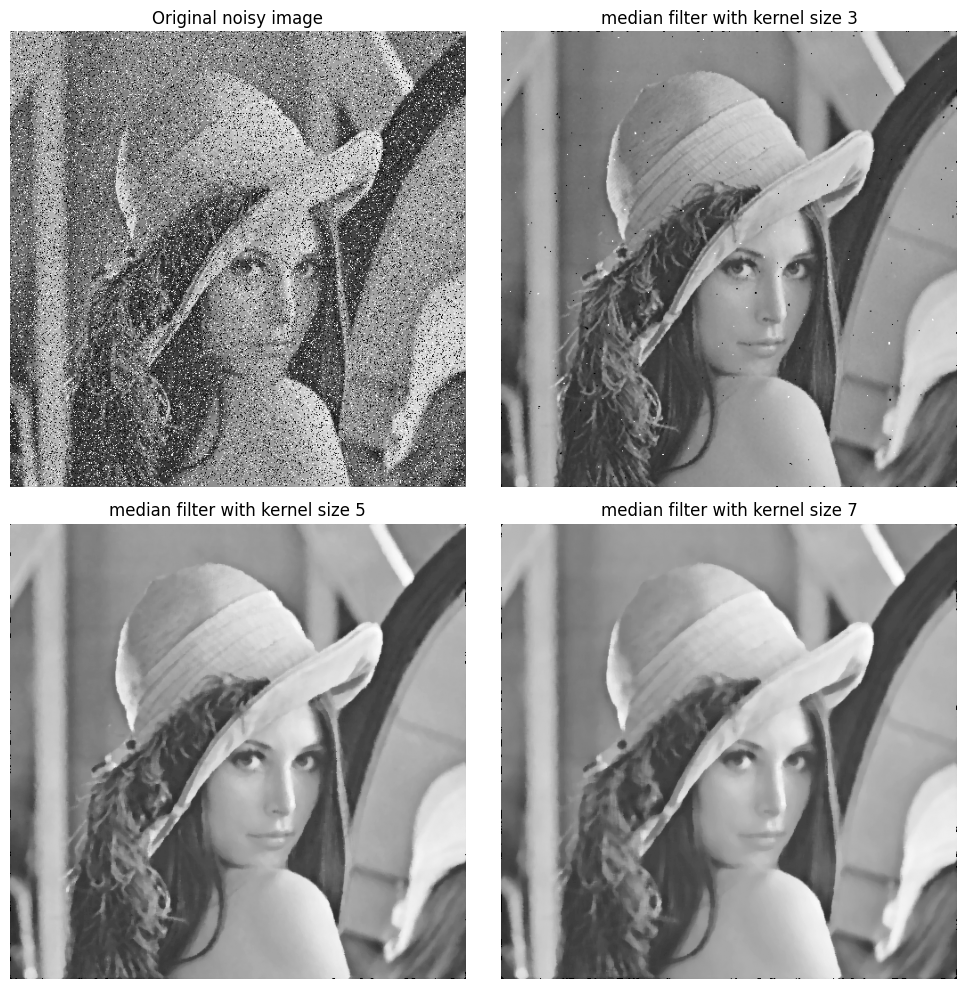

In [11]:
display_results(a[0], apply_median_filter, filter_name="median")

###Theory Question:
Explain the reason behind the differences between the outputs of a 3✕3, 5✕5, and 7✕7 median filter.

###Your Answer:


Use cv2's built-in function(s) to do the same as the median filter you implemented above.

In [12]:
import cv2

def builtin_median_filter(image, kernel_size):
    ######################## YOUR CODE GOES HERE ########################
    filtered_image = cv2.medianBlur(image, kernel_size)
    ######################### END OF YOUR CODE ##########################
    return filtered_image

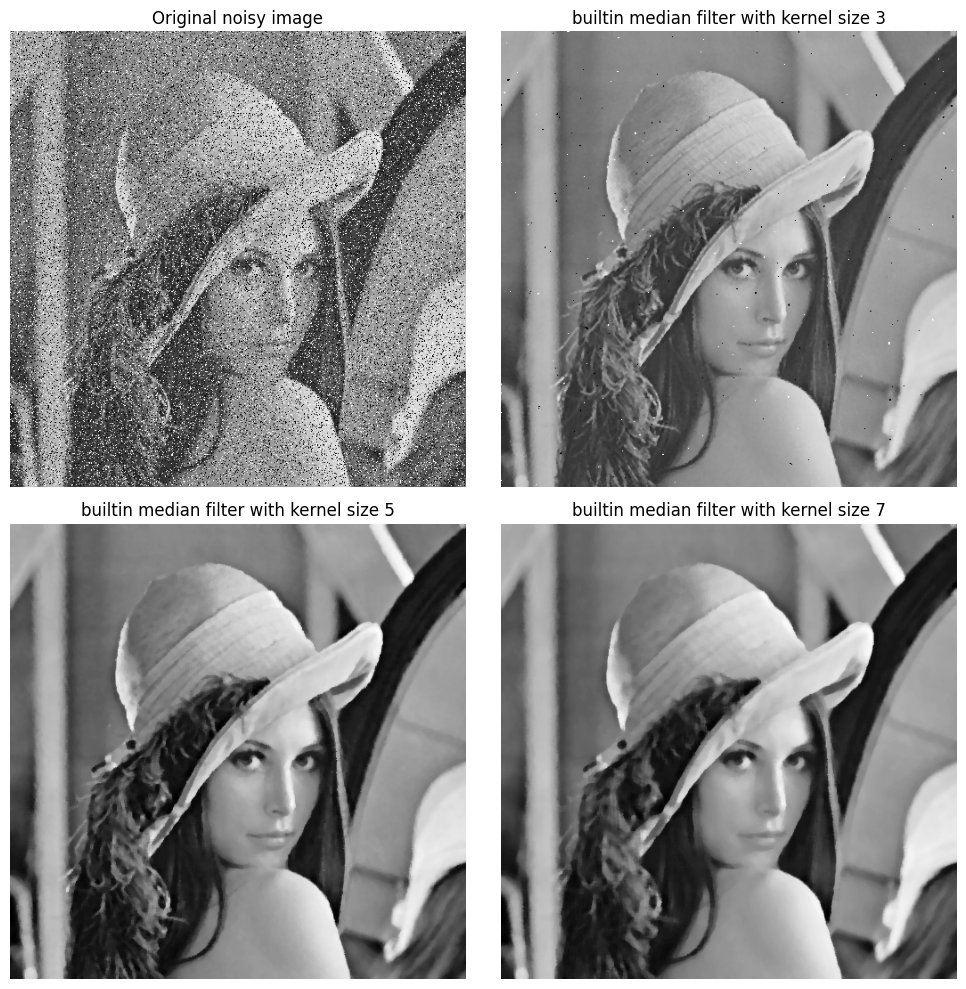

In [13]:
display_results(a[0], builtin_median_filter, filter_name="builtin median")

###Theory Question:
Explain the reason behind the differences between the outputs of a mean and median filter of the same size. Which one performs better on the task of removing salt and pepper noise? why?

###Your Answer:

### **Key Differences Between Mean and Median Filters**


####  Impact on Salt-and-Pepper Noise**
| **Filter Type** | **Effect on Salt-and-Pepper Noise** | **Edge Preservation** | **Blurring** |
|----------------|-----------------------------------|----------------------|-------------|
| **Mean Filter** | **Poor** (noise spreads due to averaging) | Weak (smoothes edges) | High |
| **Median Filter** | **Excellent** (outliers are discarded) | Strong (sharp edges remain) | Low |

####  Why Median Filter is Better for Salt-and-Pepper Noise?**
- **Salt-and-pepper noise** consists of **extreme pixel values** (0 or 255 in grayscale).  
- **Mean filter** averages these outliers with neighboring pixels, **smearing noise** across edges.  
- **Median filter** **ignores extreme values**, replacing them with a nearby valid pixel.  
- Example:  
  - A neighborhood with pixels `[10, 15, 255 (salt), 20, 30]`  
  - **Mean:** `(10+15+255+20+30)/5 = 66` (noisy result).  
  - **Median:** Sorted → `[10, 15, 20, 30, 255]` → **20** (clean result).  

####  Visual Comparison**
- **Mean Filter:**  
  - Output appears **blurry** because noise is "averaged in."  
- **Median Filter:**  
  - Output retains **sharp transitions** (e.g., edges, textures) while removing noise.  

####  When to Use Which?
- **Use Median Filter for:**  
  - Salt-and-pepper noise (best performance).  
  - Images requiring edge preservation (e.g., medical imaging, text).  
- **Use Mean Filter for:**  
  - Gaussian noise (uniform small perturbations).  
  - Smoothing without extreme outliers.  

### **Conclusion**
For **salt-and-pepper noise**, the **median filter is superior** because:  
1. It **completely removes extreme values** without spreading them.  
2. It **preserves edges** better than linear filters.  
3. It is **robust to high-intensity noise** (unlike mean filtering).  

The mean filter, while simpler, is **not suitable** for this type of noise because it **distorts clean pixels** by averaging them with corrupted ones.  

### **Practical Demonstration**

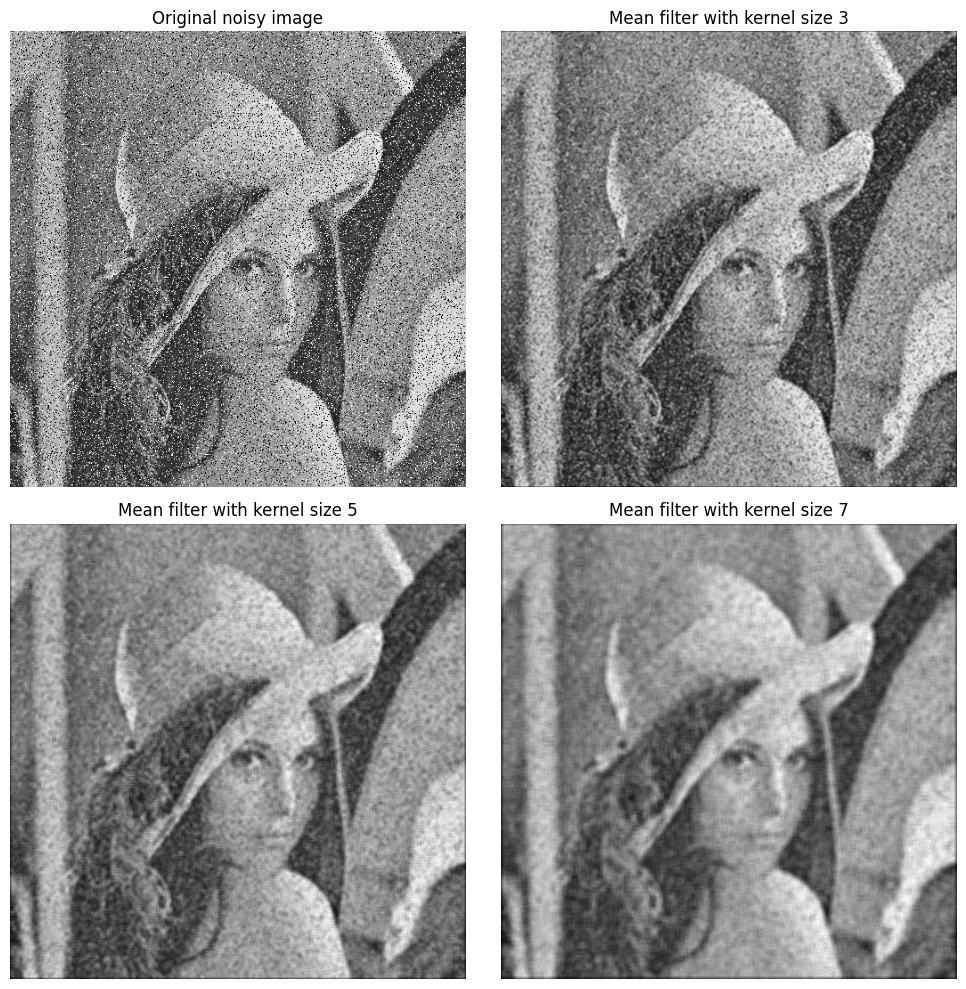

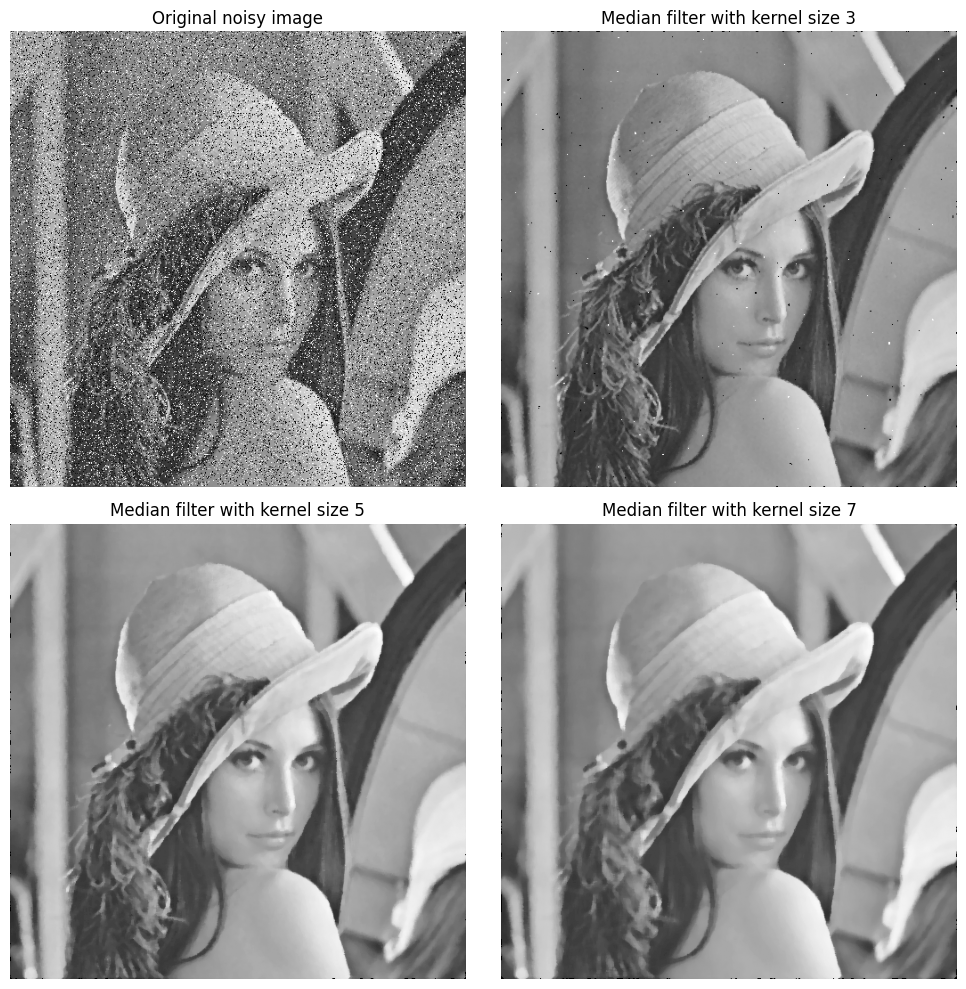

In [14]:
display_results(a[0], apply_mean_filter, filter_name="Mean")
display_results(a[0], apply_median_filter, filter_name="Median")